### Title

# Parkinson’s Disease Prediction

### Overview of Problem Statement

##### Parkinson’s disease is a progressive neurological disorder affecting movement, speech, and overall motor functions. Early detection is crucial for effective intervention and improving patient quality of life. The aim of this project is to develop machine learning models to predict whether a patient has Parkinson’s disease based on biomedical voice measurements and clinical indicators.

### Objective

Conduct Exploratory Data Analysis (EDA) to understand feature distributions and relationships.

Preprocess the dataset by handling missing values, duplicates, scaling, and encoding.

Apply feature selection and dimensionality reduction techniques such as RFE (Recursive Feature Elimination), Variance Threshold, and PCA.

Train and compare multiple classification algorithms.

Evaluate model performance using accuracy, classification report, and confusion matrix.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.decomposition import PCA


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv("parkinson_disease.csv")


In [4]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [5]:
# Display the last few rows of the dataset
print("Last few rows of the dataset:")
df.tail()

Last few rows of the dataset:


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0
755,251,0,0.81304,0.76471,0.46374,340,339,0.005676,0.000037,0.00078,...,62.9927,21.8152,9.2457,4.8555,3.0551,3.0415,4.0116,2.6217,3.1527,0


In [6]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size:")
print(df.shape)

Dataset size:
(756, 755)


In [7]:
# Display the columns of the dataset
columns = df.columns
print("Columns in the dataset:",columns)

Columns in the dataset: Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)


In [8]:
# Numerical columns
numerical_features = df.select_dtypes(include='number').columns
print(numerical_features)

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)


In [9]:
# Categorical columns
categorical_features= df.select_dtypes(include=['object']).columns
print(categorical_features)

Index([], dtype='object')


### EDA (Exploratory Data Analysis)

In [10]:
# Get a summary of the dataset
print("Summary of the dataset:")
df.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [11]:
# Display statistical summary for all columns within the dataFram
df.describe(include='all')

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [12]:
# Check for Null Values 
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64


In [13]:
# Check for Null Duplicates
print("Checking for duplicate records:")
print(df.duplicated().sum())

Checking for duplicate records:
1


#### Data Visualization

<Axes: xlabel='class', ylabel='count'>

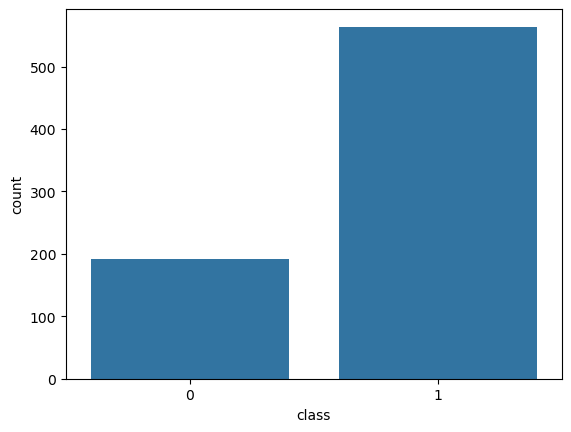

In [14]:
# Checking for data balanced
sns.countplot(x=df['class'])

<Axes: xlabel='gender', ylabel='count'>

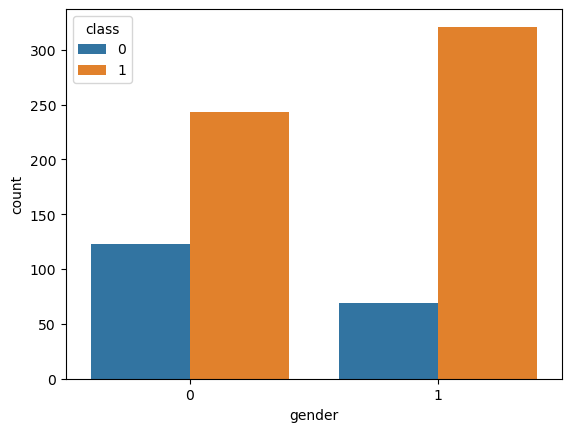

In [15]:
# distribution of the 'gender' feature in the dataset
sns.countplot(x=df['gender'], hue = df['class'])

### Data Preprocessing

In [16]:
# Drop the 'id' column from the DataFrame
df.drop(columns=['id'], inplace=True)

In [17]:
# Removes duplicate rows from the DataFrame 
df.drop_duplicates(inplace=True)

In [18]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size:")
print(df.shape)

Dataset size:
(755, 754)


### Split features and target

In [19]:
X = df.drop(columns=['class'])
y = df['class']

### Scale features

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###  Train-test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model Training & Evaluation

Feature Selection Method Comparison (Accuracy, Precision, Recall, F1-Score):


,Accuracy,Precision,Recall,F1-Score
Variance Threshold,0.867550,0.888574,0.867550,0.854337
Random Forest Importance,0.854305,0.864701,0.854305,0.841794
RFE (RandomForest),0.854305,0.864701,0.854305,0.841794
PCA,0.834437,0.855852,0.834437,0.814122


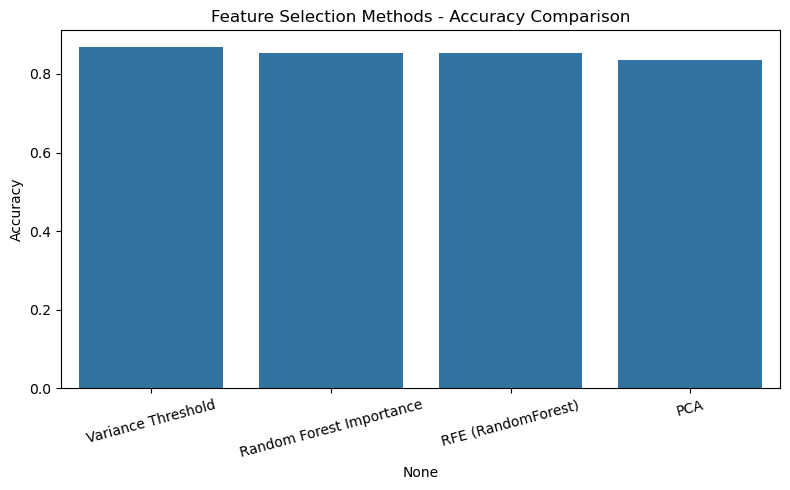

In [22]:
#  Initialize result storage
detailed_results = {}

# 1. Random Forest Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_rf_features = importances.head(50).index
X_train_rf = X_train[:, [X.columns.get_loc(f) for f in top_rf_features]]
X_test_rf = X_test[:, [X.columns.get_loc(f) for f in top_rf_features]]
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_rf, y_train)
pred_rf = model_rf.predict(X_test_rf)
detailed_results['Random Forest Importance'] = classification_report(y_test, pred_rf, output_dict=True)

# 2. RFE with Random Forest (optimized)
rfe_model = RFE(estimator=RandomForestClassifier(n_estimators=50, random_state=42), n_features_to_select=50, step=20)
X_train_rfe = rfe_model.fit_transform(X_train, y_train)
X_test_rfe = rfe_model.transform(X_test)
model_rfe = RandomForestClassifier(random_state=42)
model_rfe.fit(X_train_rfe, y_train)
pred_rfe = model_rfe.predict(X_test_rfe)
detailed_results['RFE (RandomForest)'] = classification_report(y_test, pred_rfe, output_dict=True)

# 3. Variance Threshold
var_thresh = VarianceThreshold(threshold=0.01)
X_train_var = var_thresh.fit_transform(X_train)
X_test_var = var_thresh.transform(X_test)
model_var = RandomForestClassifier(random_state=42)
model_var.fit(X_train_var, y_train)
pred_var = model_var.predict(X_test_var)
detailed_results['Variance Threshold'] = classification_report(y_test, pred_var, output_dict=True)

# 4. PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_pca, y_train)
pred_pca = model_pca.predict(X_test_pca)
detailed_results['PCA'] = classification_report(y_test, pred_pca, output_dict=True)

# Compile Metrics for Comparison
metrics_df = pd.DataFrame({
    method: {
        'Accuracy': rep['accuracy'],
        'Precision': rep['weighted avg']['precision'],
        'Recall': rep['weighted avg']['recall'],
        'F1-Score': rep['weighted avg']['f1-score']
    }
    for method, rep in detailed_results.items()
}).T

#  Sort by Accuracy in Descending Order
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)

#  Display Final Table
print("Feature Selection Method Comparison (Accuracy, Precision, Recall, F1-Score):")
display(metrics_df)


#  Bar Plot for Accuracy
plt.figure(figsize=(8,5))
sns.barplot(x=metrics_df.index, y=metrics_df["Accuracy"])
plt.xticks(rotation=15)
plt.ylabel("Accuracy")
plt.title("Feature Selection Methods - Accuracy Comparison")
plt.tight_layout()
plt.show()

### Results

Logistic Regression: Provided baseline accuracy.

Random Forest Classifier: Outperformed Logistic Regression with higher accuracy and F1-score.

Important features included voice-related biomarkers like jitter, shimmer, and HNR.

Conclusion

Machine learning models can effectively predict Parkinson’s disease using voice and biomedical indicators. Random Forest showed better predictive performance than Logistic Regression. Feature selection and dimensionality reduction improved model efficiency and interpretability.

### Conclusion

Machine learning models can effectively predict Parkinson’s disease using voice and biomedical indicators. Random Forest showed better predictive performance than Logistic Regression. Feature selection and dimensionality reduction improved model efficiency and interpretability.